# Root Finding
1. Bisection method
1. Newton method
1. Secant method

## Bisection Method

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
def fct(x):
    return x**3
def fctPrime(x):
    return 3*x**2


In [5]:
from numpy import sign
def bisection(f,low,high,x_tol,y_tol):
    s_low=sign(f(low))
    s_high=sign(f(high))
    if s_low*s_high!=-1:
        print('Error: Initial values of the function must have different signs')
        return 
    m=(low+high)/2
    while (high-low)>=(2*x_tol): # When false the answer is between m-x_tol and m+x_tol
        fm=f(m)
        # Not very accurate unless y_tol is extremely small
        if abs(fm)<=y_tol: # the value of the function is between 0-y_tol and 0+y_tol
            return m
        s_m=sign(fm)
        if s_m==s_low: # When true the answer is between m and high
            low=m
        else:          # the answer is between low and m
            high=m     
        m=(low+high)/2

    return m

root=bisection(fct,-2,9,10e-6,10e-12) 
print(root)
from math import sin
root=bisection(sin,-1,2,10e-6,10e-6)
print(root)


6.103515625e-05
7.62939453125e-06


In [6]:
from numpy import random,pi
def findInterval(f,low=-100,high=100,repeat=100):
  
    for i in range(repeat):
        x,y=random.uniform(low=low,high=high,size=2)
        if sign(f(x))!=sign(f(y)):
            if x<0:
                return x,y
            else:
                return y,x

r=findInterval(sin)
if r!=None:
    root=bisection(sin,r[0],r[1],10e-5,10e-5)
print(root/pi)

-25.99998726442191


10.173899190500475
3.5078396649623755e-06


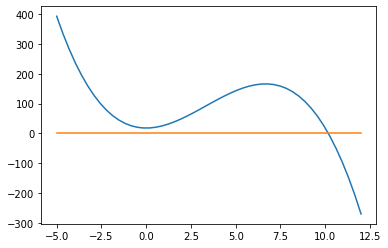

In [7]:
import numpy as np
def func(x):
    return 10*x**2-x**3+18

r=findInterval(func)
if r!=None:
    root=bisection(func,r[0],r[1],10e-8,10e-12)
print(root)
print(func(root))

x=np.linspace(-5,12)
y=[func(v) for v in x]
plt.plot(x,y)
plt.plot([-5,12],[0,0])
plt.show()

## Newton-Ralphson Method

- Our goal is to find the root of a function $f(x)$, i.e. find $x$ for which $f(x)=0$
- Starting from an initial guess $x_i$, the equation of the tangent to $f(x)$ at $x=x_i$ is
$$y=f'(x_i)(x-x_i)+f(x_i)$$
- Where $f'(x_i)$ is the derivative of $f(x)$ evaluated at $x_i$
- The tangent crosses the x-axis when $y=0$ thus
$$x=x_i-\frac{f(x_i)}{f'(x_i)}$$
- That point is closer to the root than $x_i$.

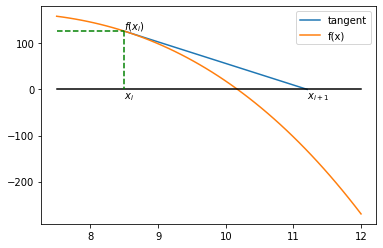

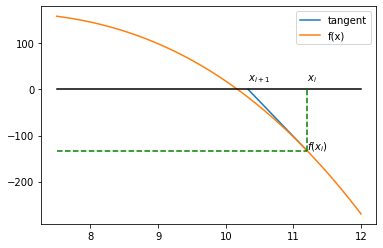

In [8]:
def func(x):
    return 10*x**2-x**3+18
def funcPrime(x):
    return 20*x-3*x**2

plt.figure(1)
x_i=8.5
x_i_1=x_i-func(x_i)/funcPrime(x_i)
x=np.linspace(7.5,12)
y=[func(v) for v in x]
plt.plot([x_i,x_i_1],[func(x_i),0],label="tangent")
plt.plot(x,y,label="f(x)")
plt.plot([7.5,12],[0,0],"k")
plt.legend(loc=0)
plt.text(x_i,-20,"$x_i$")
plt.text(x_i,130,"$f(x_i)$")

plt.text(x_i_1,-20,"$x_{i+1}$")
plt.plot([7.5,x_i],[func(x_i),func(x_i)],"--g")
plt.plot([x_i,x_i],[func(x_i),0],"--g")

#plt.show()
plt.figure(2)
x_i=x_i_1
x_i_1=x_i-func(x_i)/funcPrime(x_i)
x=np.linspace(7.5,12)
y=[func(v) for v in x]
plt.plot([x_i,x_i_1],[func(x_i),0],label="tangent")
plt.plot(x,y,label="f(x)")
plt.plot([7.5,12],[0,0],"k")
plt.legend(loc=0)
plt.text(x_i,20,"$x_i$")
plt.text(x_i,-130,"$f(x_i)$")

plt.text(x_i_1,20,"$x_{i+1}$")
plt.plot([7.5,x_i],[func(x_i),func(x_i)],"--g")
plt.plot([x_i,x_i],[func(x_i),0],"--g")

In [9]:

def newton(f,fprime,guess,maxIter,y_tol):
    n,x=0,guess

    while n<=maxIter:
        fx=f(x)
        fpx=fprime(x)
        if abs(fx)<y_tol:
            return x
        x=x-fx/fpx
        n+=1
    return x

root=newton(func,funcPrime,4,1000,10e-5)
print(root)
func(root)

10.173899850773854


-6.717224937347055e-05

### Example 2

- Find $x$ such that $x=2\sin x$
- First we rewrite $f(x)=x-2\sin x$. Now we are looking for the root of $f(x)$
- $f'(x)=1-2\cos x$

1.8954945666276892


4.907480755100835e-07

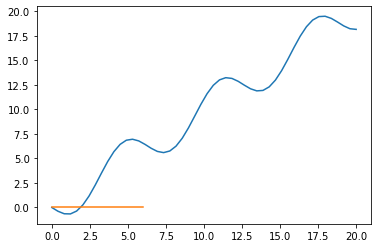

In [11]:
from numpy import sin,cos

def f(x):
    return x-2*sin(x)
def fprime(x):
    return 1-2*cos(x)

x=np.linspace(0,20)
y=[f(v) for v in x]
plt.plot(x,y)
plt.plot([0,6],[0,0])
root=newton(f,fprime,1,1000,10e-5)
print(root)
f(root)

### Secant Method

In [12]:
from numpy import sin
def f(x):
    return x-2*sin(x)
def secant(f,x0,x1,maxIter,y_tol):
    n=0

    while n<=maxIter:

        fx0=f(x0)
        fx1=f(x1)
        fpx=(fx1-fx0)/(x1-x0)
        if abs(fx1)<y_tol:
            return x1
        x2=x1-fx1/fpx
        x0=x1
        x1=x2
        n+=1
    return x1

root=secant(f,1,1.1,1000,10e-5)
print(root)
#f(root)

1.8954947578321109


### Example 3
- Estimate the value of _e_. We know that
$$\ln e=1$$
- Root of $$\ln x -1 =0$$

In [24]:
from numpy import log,e
def f(x):
    return log(x)-1
def fp(x):
    return 1/x

root=newton(f,fp,8,1000,10e-5)
print(f'value={e:.4f},computed={root:.4f}')

value=2.7183,computed=nan


<ipython-input-24-81a3c5561af4>:3: RuntimeWarning: invalid value encountered in log
  return log(x)-1


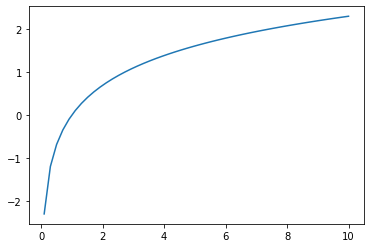

In [25]:
x=np.linspace(0.1,10)
y=[log(v) for v in x]
plt.plot(x,y)